<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/AdEaseTimeSeries_CaseStudy_Mariya_DSML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
AdEase is trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that it can predict and optimize the ad placement for it's clients.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# test_df = pd.read_csv('https://drive.google.com/file/d/1qQkymAitU6l2pSe702rDUhQpoP8MUZXl/view?usp=share_link')

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Exog_Campaign_eng to Exog_Campaign_eng


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_1.csv to train_1.csv


In [3]:
# Import the required libraries
# Libraries for Data Processing
import numpy as np
import pandas as pd
import scipy.stats
import re
import io

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm


In [117]:
for fn in uploaded.keys():
  print('The file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

The file "Exog_Campaign_eng" with length 1105 bytes


In [8]:
exog_df = pd.read_csv('Exog_Campaign_eng')

In [9]:
exog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [10]:
exog_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [11]:
exog_df.shape

(550, 1)

In [12]:
# data_df = pd.read_csv('https://drive.google.com/file/d/1qQkymAitU6l2pSe702rDUhQpoP8MUZXl/view?usp=share_link')
# data_df = pd.read_csv('https://drive.google.com/file/d/1JSOdwBweD3TpsdiSiHH82WC7GZxYCqUr/view?usp=share_link')
# data_df = pd.read_csv('/content/sample_data/train_1.csv')
data_df = pd.read_csv('/content/train_1.csv')


In [13]:
data_df.shape

(145063, 551)

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [15]:
data_df.head(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [16]:
data_df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [17]:
df = data_df.copy(deep=True)

In [18]:
df.isnull().any(axis=1).sum()

27786

# Data Pre-Processing
SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN has to be separated into Title, Language, Access Type and Access Origin

In [19]:
work_df = df['Page'].str.extract(r'wikipedia\.org_([A-Za-z-_]+)')[0]
work_df = work_df.str.split('_', expand=True)
work_df = pd.concat([work_df, df], axis=1).rename(columns={0:'access_type', 1:'access_origin'})
language = work_df['Page'].str.extract(r"_([A-Za-z]{2}).wikipedia.org_")
work_df = pd.concat([language, work_df], axis=1).rename(columns={0:"language"})
work_df['Page'] = work_df['Page'].str.replace(r'(_[A-Za-z]{2}.wikipedia.[A-Za-z_-]+)','',regex=True)
work_df = work_df.rename(columns={'Page':'title'})
data_df = work_df.copy()

In [20]:
data_df.head()

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,zh,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,zh,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,zh,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,zh,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,zh,all-access,spider,52_Hz_I_Love_You,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [21]:
data_df['language'].value_counts()

en    24108
ja    20431
de    18547
fr    17802
zh    17229
ru    15022
es    14069
Name: language, dtype: int64

In [22]:
lang_dict = {'es':'spanish', 'zh':'chinese', 'ru':'russian', 'fr':'french', 'de':'german', 'en':'english', 'ja':'japanese'}
data_df['language'] = data_df['language'].map(lang_dict)

In [23]:
data_df.head()

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,chinese,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,chinese,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,chinese,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,chinese,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,chinese,all-access,spider,52_Hz_I_Love_You,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


### Chcek for Missing Values

In [24]:
data_df.isnull().sum()

language         17855
access_type      17855
access_origin    17855
title                0
2015-07-01       20740
                 ...  
2016-12-27        3701
2016-12-28        3822
2016-12-29        3826
2016-12-30        3635
2016-12-31        3465
Length: 554, dtype: int64

In [25]:
print(round(data_df.isna().any(axis=1).sum() / data_df.shape[0]*100,2), '% null rows')

25.48 % null rows


In [26]:
data_df.dropna().shape[0] / data_df.shape[0]

0.7452279354487361

In [27]:
data_df.dropna(inplace=True)

In [28]:
data_df.shape

(108105, 554)

# Exploratory Data Analysis (EDA)

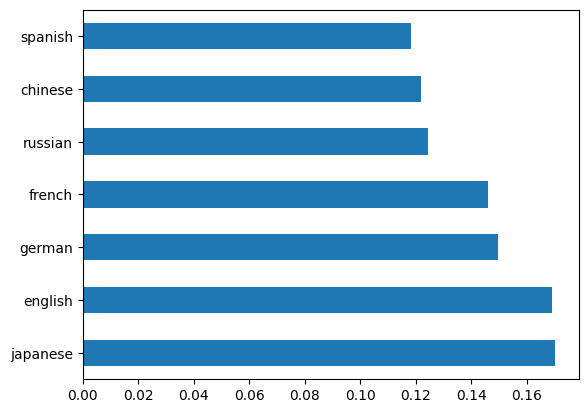

In [29]:
data_df['language'].value_counts(normalize=True).plot(kind='barh')
plt.show()

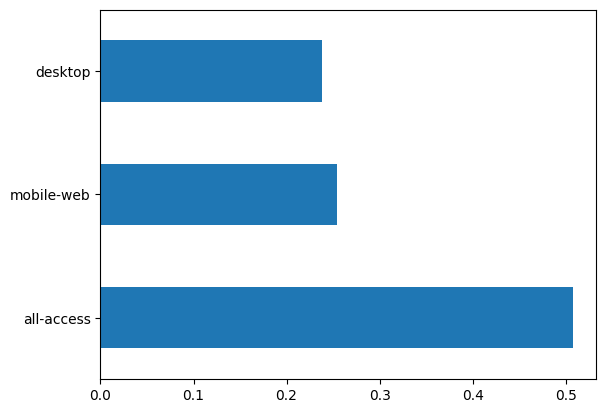

In [30]:
data_df['access_type'].value_counts(normalize=True).plot(kind='barh')
plt.show()

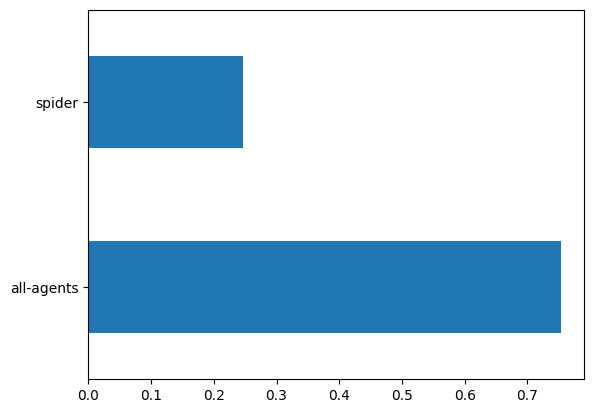

In [31]:
data_df['access_origin'].value_counts(normalize=True).plot(kind='barh')
plt.show()

### Convert the data format

In [32]:
data_df.head()

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,chinese,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,chinese,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,chinese,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,chinese,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,chinese,all-access,spider,5566,12.0,7.0,4.0,5.0,20.0,8.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


In [33]:
data_df.columns[4:]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [34]:
data_df.group = data_df.groupby(['language'])[data_df.columns[4:]].median()

In [35]:
data_TS = data_df.group.T

In [36]:
data_TS.index = np.vectorize(lambda x: np.datetime64(x))(data_TS.index)

In [37]:
data_TS.shape

(550, 7)

In [38]:
data_TS['exog'] = exog_df['Exog'].values

In [39]:
data_TS.tail()

language,chinese,english,french,german,japanese,russian,spanish,exog
2016-12-27,122.0,975.0,210.0,194.0,242.0,352.0,234.0,1
2016-12-28,122.0,944.0,211.0,196.0,230.0,337.0,242.0,1
2016-12-29,115.0,961.0,207.0,189.0,245.0,323.0,235.0,1
2016-12-30,113.0,922.0,211.0,182.0,252.0,294.0,209.0,0
2016-12-31,109.0,853.0,183.0,150.0,236.0,233.0,162.0,0


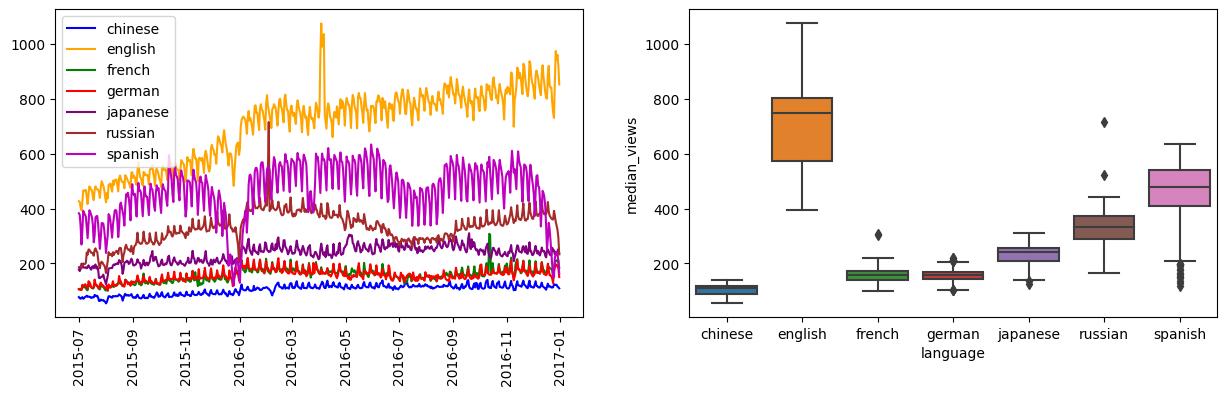

In [40]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
lang = list(data_TS.columns[:-1])
colors = ['blue','orange','green', 'red', 'purple', 'brown', 'm']
for i in range(len(lang)):
  plt.plot(data_TS.index, data_TS[lang[i]], color=colors[i], label=lang[i])
plt.legend()
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.boxplot(data=data_TS.reset_index().melt(id_vars=['index'], value_vars=data_TS.columns[:-1]).set_index('index'), y='value', x='language')
# sns.boxplot(data=data_TS.reset_index().melt(id_vars=["index"], value_vars=data_TS.columns[:-1]).set_index("index"), y="value",x="language")
plt.ylabel("median_views")
plt.show()

<Axes: ylabel='language'>

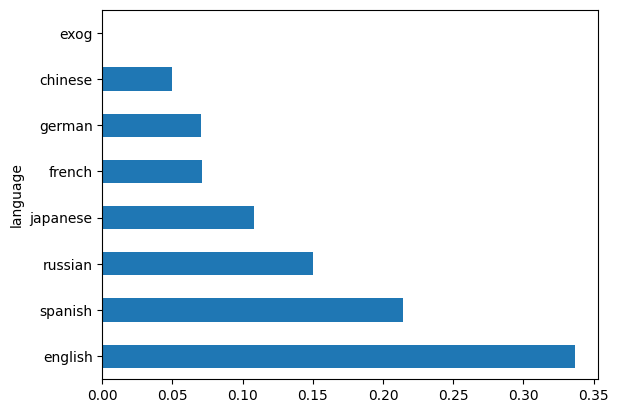

In [41]:
(data_TS.median(axis=0).sort_values(ascending=False)/data_TS.median(axis=0).sort_values(ascending=False).sum()).plot(kind='barh')

# Stationarity (Dickey-Fuller test)

In [42]:
# check if the data is stationary
sm.tsa.stattools.adfuller(data_TS['english'])

(-1.5337596068591954,
 0.5167497879782436,
 19,
 530,
 {'1%': -3.4427485933555886,
  '5%': -2.8670087381529723,
  '10%': -2.569682641509434},
 5062.231417057528)

In [43]:
for col in data_TS.columns[:-1]:
  pval = sm.tsa.stattools.adfuller(data_TS[col])[1]
  if pval >= 0.05:
    print(col, ": Sequence is not stationary")
  else:
    print(col, ": Sequence is stationary")


chinese : Sequence is not stationary
english : Sequence is not stationary
french : Sequence is not stationary
german : Sequence is not stationary
japanese : Sequence is not stationary
russian : Sequence is not stationary
spanish : Sequence is stationary


In [44]:
def adf_test(data, significance=0.05):
  pval = sm.tsa.stattools.adfuller(data)[1]
  if pval <= significance:
    print("Sequence is Stationary")
  else:
    print("Sequence is not Stationary")

# Decomposition & Differencing the Time Series

### Decomposition by 'english'

In [45]:
model_en = sm.tsa.seasonal_decompose(data_TS['english'], model='additive')

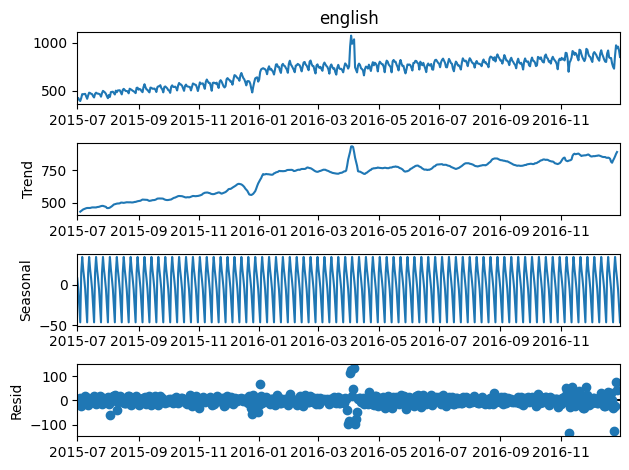

In [46]:
temp = model_en.plot()

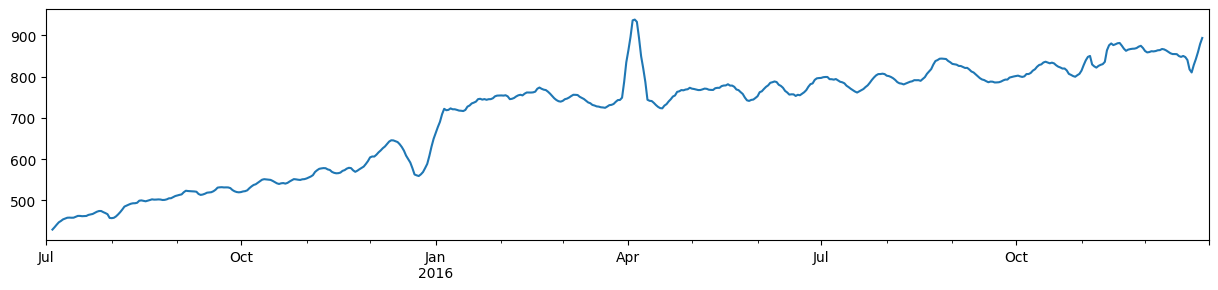

In [47]:
model_en.trend.plot(figsize=(15, 3))
plt.show()

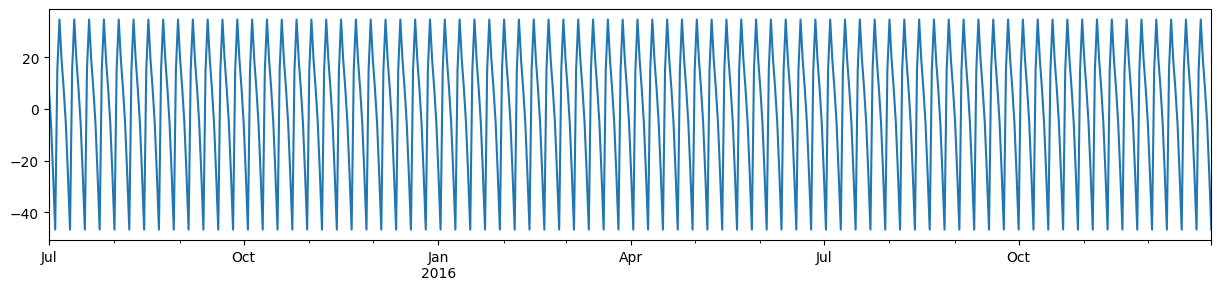

In [48]:
model_en.seasonal.plot(figsize=(15, 3))
plt.show()

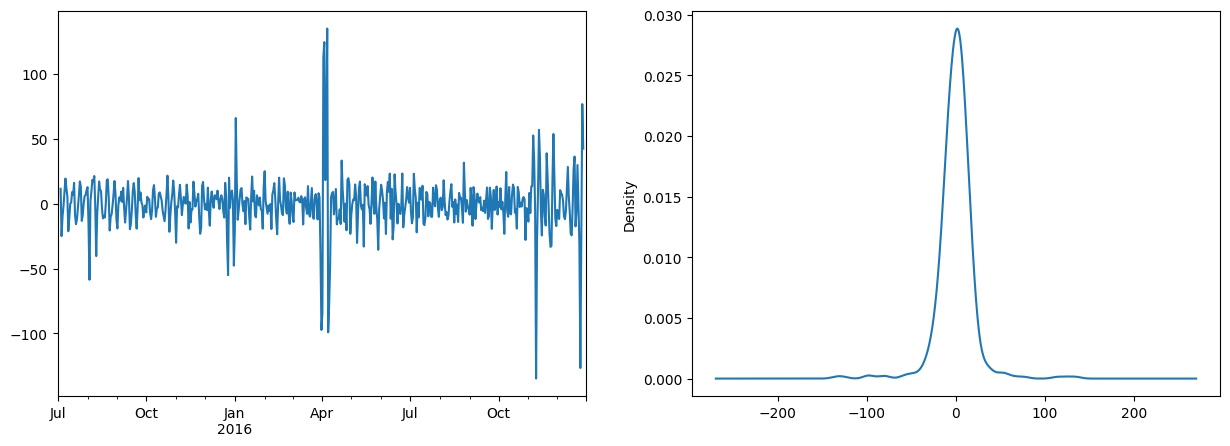

In [49]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
model_en.resid.plot()
plt.subplot(1, 2, 2)
model_en.resid.plot(kind='kde')
plt.show()

### Decomposition from Scratch

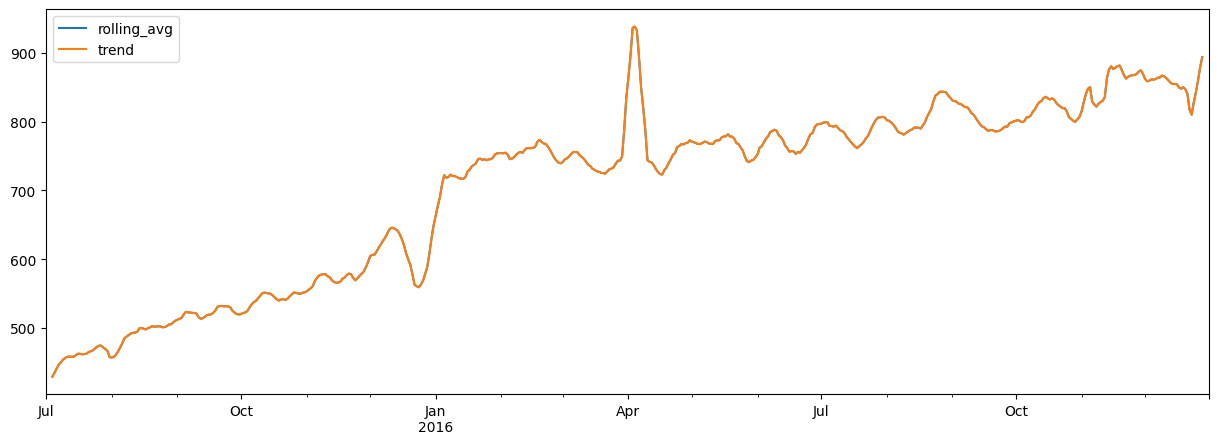

In [50]:
trend_temp = data_TS['english'].rolling(7, center=True).mean()
plt.figure(figsize=(15, 5))
trend_temp.plot(label='rolling_avg')
model_en.trend.plot()
plt.legend()
plt.show()

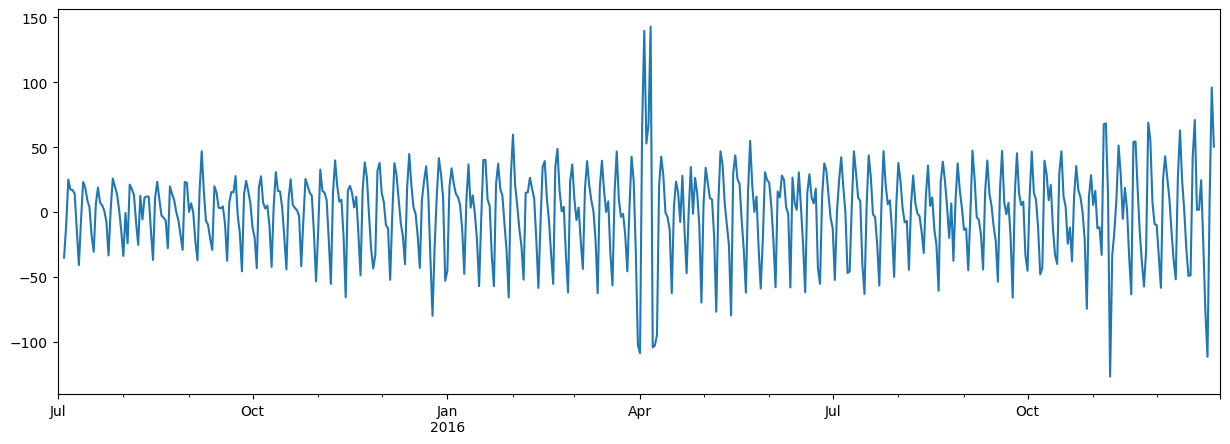

In [51]:
de_trend = data_TS['english'] - trend_temp
de_trend.plot(figsize=(15, 5))
plt.show()

In [52]:
de_trend.reset_index().head()

,index,english
0,2015-07-01,NaN
1,2015-07-02,NaN
2,2015-07-03,NaN
3,2015-07-04,-35.142857
4,2015-07-05,-9.857143


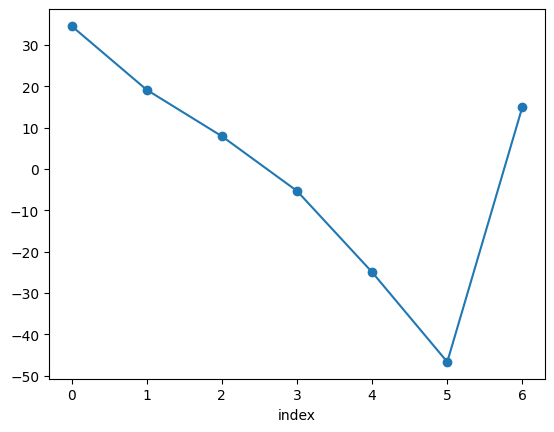

In [53]:
dtf = de_trend.reset_index()
dtf.groupby(dtf['index'].dt.day_of_week)['english'].mean().plot(style='-o')
plt.show()

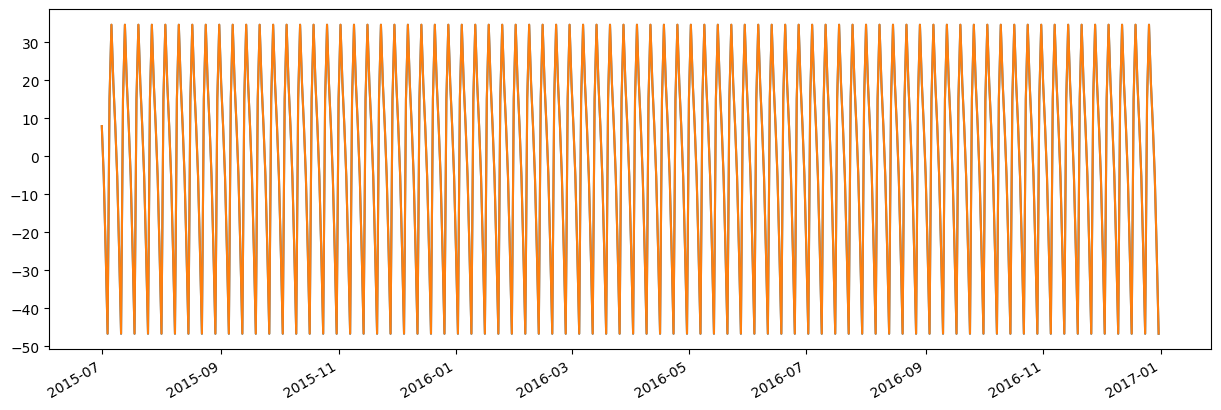

In [54]:
plt.figure(figsize=(15, 5))
plt.plot(dtf['index'], dtf.groupby(dtf['index'].dt.day_of_week)['english'].transform('mean'))
model_en.seasonal.plot()
plt.show()

### Differencing - Time series data for 'english'

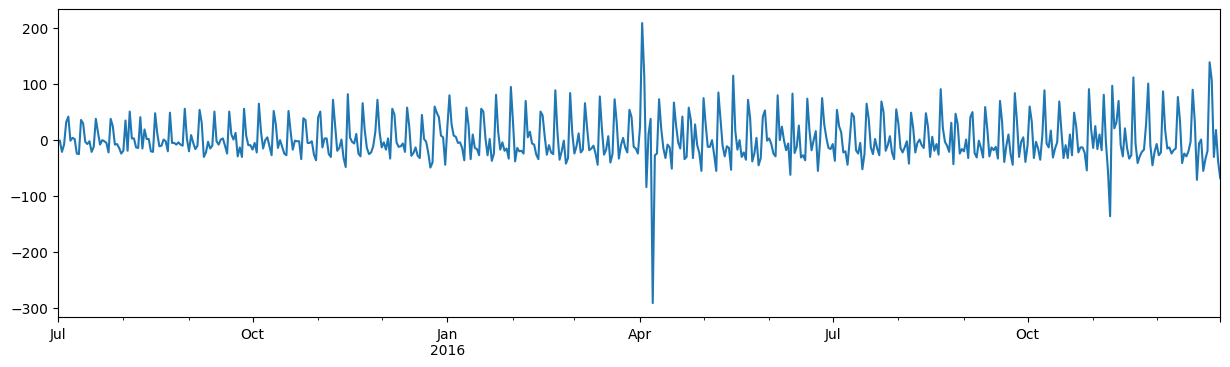

In [55]:
data_TS['english'].diff().plot(figsize=(15, 4))
plt.show()

In [56]:
adf_test(data_TS['english'].diff().dropna())

Sequence is Stationary


# Plotting ACF and PACF Plots

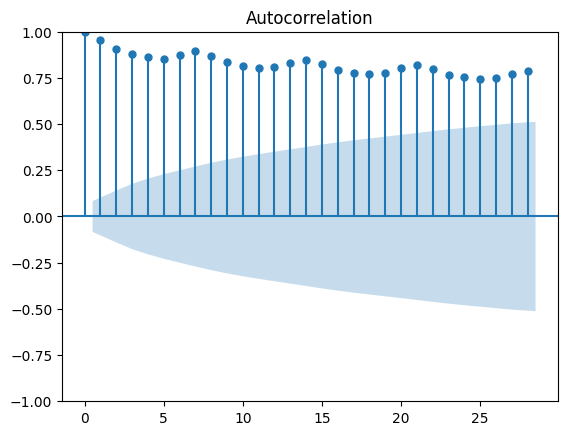

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
z = plot_acf(data_TS['english'])

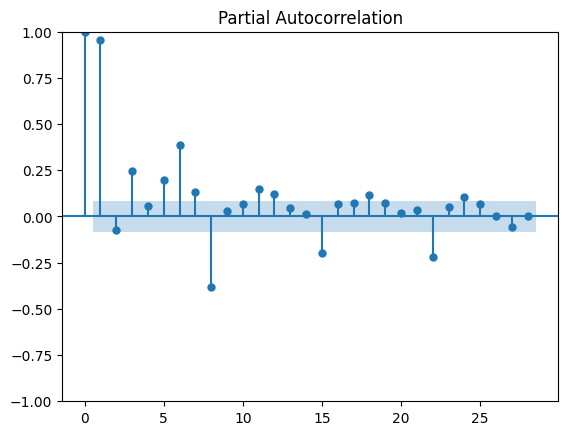

In [58]:
y = plot_pacf(data_TS['english'], lags=None)

# Model Building

# Split train & test data

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [60]:
train_X = data_TS.loc[data_TS.index[:-61]]

In [61]:
test_X = data_TS.loc[data_TS.index[-61:]]

In [62]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape 

In [63]:
def performance_metrics(actual, predicted):
  print("MAE :", round(mae(actual, predicted), 3))
  print("RMSE : ", round(mse(actual, predicted), 3))
  print("MAPE : ", round(mape(actual, predicted), 3))

### Train the Arima Model

In [64]:
train_X['english'].head()

2015-07-01    427.0
2015-07-02    425.0
2015-07-03    403.0
2015-07-04    394.0
2015-07-05    425.0
Name: english, dtype: float64

In [65]:
adf_test(train_X['english'])

Sequence is not Stationary


In [66]:
adf_test(train_X['english'].diff(1).dropna())

Sequence is Stationary


In [67]:
pred = pd.DataFrame(index=test_X.index)

### Grid Search

In [68]:
ar = [8, 9, 10]
ma = [4, 5, 6]

In [120]:
result = []
for p in ar: 
  for q in ma:
    model_temp = SARIMAX(train_X['english'], order=(p, 1, q))
    model_temp = model_temp.fit(disp=False)
    result.append([p, q, round(mape(test_X['english'], model_temp.forecast(steps=61)), 3)])

In [70]:
pd.DataFrame(result, columns=['p', 'q', 'mape']).sort_values(by='mape', ascending=True)

,p,q,mape
4,9,5,0.067
8,10,6,0.067
1,8,5,0.068
2,8,6,0.068
5,9,6,0.068
7,10,5,0.074
3,9,4,0.077
6,10,4,0.080
0,8,4,0.081


In [121]:
model_AR = SARIMAX(train_X['english'], order=(9, 1, 5))
model_AR = model_AR.fit(disp=False)

In [72]:
pred['english'] = model_AR.forecast(steps=61)

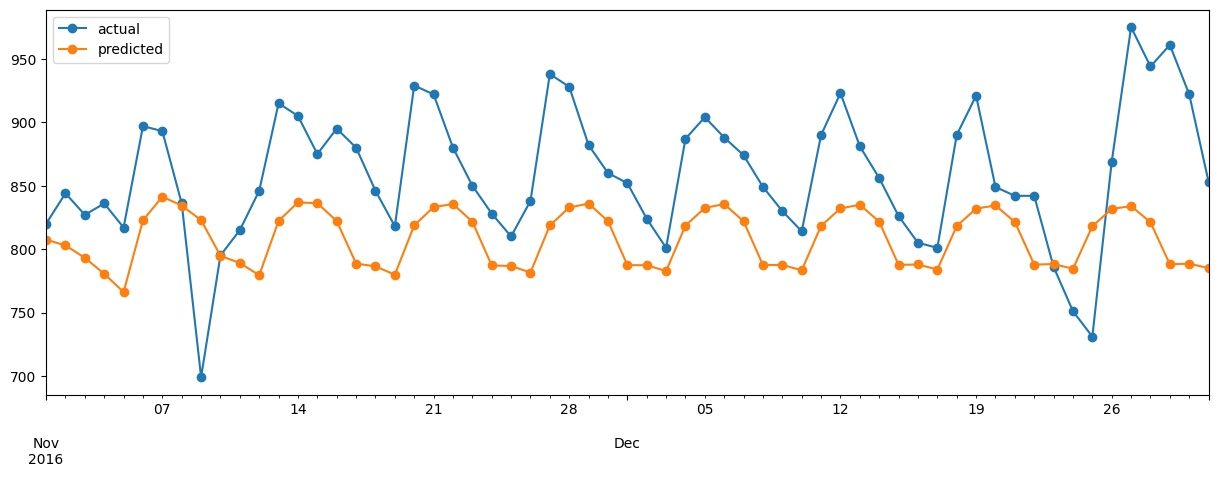

In [73]:
test_X['english'].plot(style='-o', figsize=(15, 5), label='actual')
pred['english'].plot(style='-o', label='predicted')
plt.legend()
plt.show()

In [74]:
performance_metrics(test_X['english'], pred['english'])

MAE : 58.276
RMSE :  4695.387
MAPE :  0.067


### Use exogenous variable to train SARIMAX model

In [122]:
ar_seasonal = [2, 3]
ma_seasonal = [2, 3]

result = []
exog_forecast = test_X[['exog']]

for i in ar_seasonal:
  for j in ma_seasonal:
    model = SARIMAX(train_X['english'], exog=train_X['exog'], order=(9, 1, 5), seasonal_order=(i, 1, j, 14))
    model = model.fit(disp=False)
    predictions = model.predict(start=test_X.index[0], end=test_X.index[-1], exog=exog_forecast).rename('Predictions')
    result.append([i, j, round(mape(test_X['english'], predictions), 3)])


In [76]:
pd.DataFrame(result, columns=['i', 'j', 'mape']).sort_values(by='mape', ascending=True)

,i,j,mape
1,2,3,0.044
3,3,3,0.045
0,2,2,0.046
2,3,2,0.047


In [123]:
model = SARIMAX(train_X['english'], exog=train_X['exog'], order=(9, 1, 5), seasonal_order=(2, 1, 3, 14))
model = model.fit(disp=False)

exog_forecast = test_X[['exog']]
predictions = model.predict(start=test_X.index[0], end=test_X.index[-1], exog=exog_forecast).rename('Predictions')

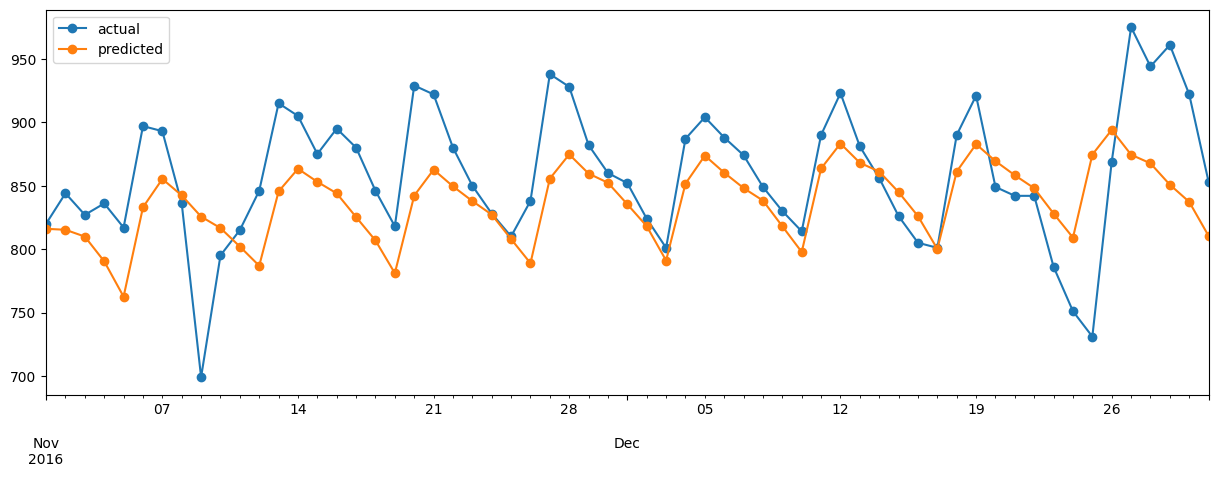

In [78]:
test_X['english'].plot(style='-o', figsize=(15, 5), label='actual')
predictions.plot(style='-o', label='predicted')
plt.legend()
plt.show()

In [79]:
performance_metrics(test_X['english'], predictions)

MAE : 37.855
RMSE :  2401.919
MAPE :  0.044


In [80]:
model.get_forecast(steps=61, exog=exog_forecast).conf_int(0.05).values[:5]

array([[772.26872289, 859.73726017],
       [757.05542579, 873.40671261],
       [744.96729856, 874.75240287],
       [718.09111437, 862.61303056],
       [684.40621597, 840.57571476]])

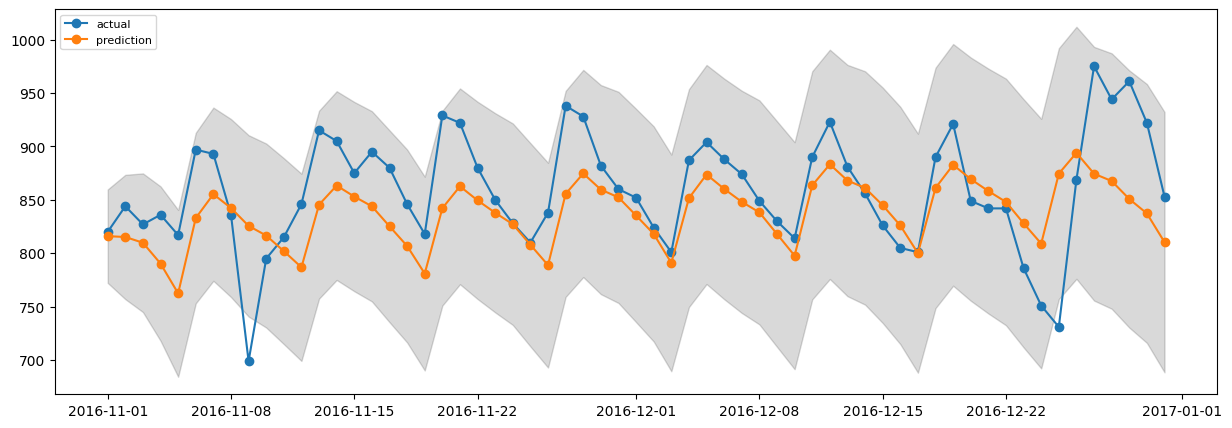

In [81]:
test_X[['lower', 'upper']] = model.get_forecast(steps=61, exog=exog_forecast).conf_int(0.1).values

plt.figure(figsize=(15, 5))
plt.plot(test_X['english'], '-o', label='actual')
plt.plot(predictions, '-o', label='prediction')
plt.fill_between(test_X.index, test_X['lower'], test_X['upper'], color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [82]:
from prophet import Prophet

In [83]:
df2 = data_TS.reset_index().loc[:, ['index', 'english', 'exog']].rename(columns={'index':'ds', 'english':'y', 'exog':'holiday'})

In [84]:
df2.head()

language,ds,y,holiday
0,2015-07-01,427.0,0
1,2015-07-02,425.0,0
2,2015-07-03,403.0,0
3,2015-07-04,394.0,0
4,2015-07-05,425.0,0


In [85]:
df2.shape

(550, 3)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi68834d7/a3vuljhu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi68834d7/5xsl1ca4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69654', 'data', 'file=/tmp/tmpi68834d7/a3vuljhu.json', 'init=/tmp/tmpi68834d7/5xsl1ca4.json', 'output', 'file=/tmp/tmpi68834d7/prophet_model7_xi2_hb/prophet_model-20230420040414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:04:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:04:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


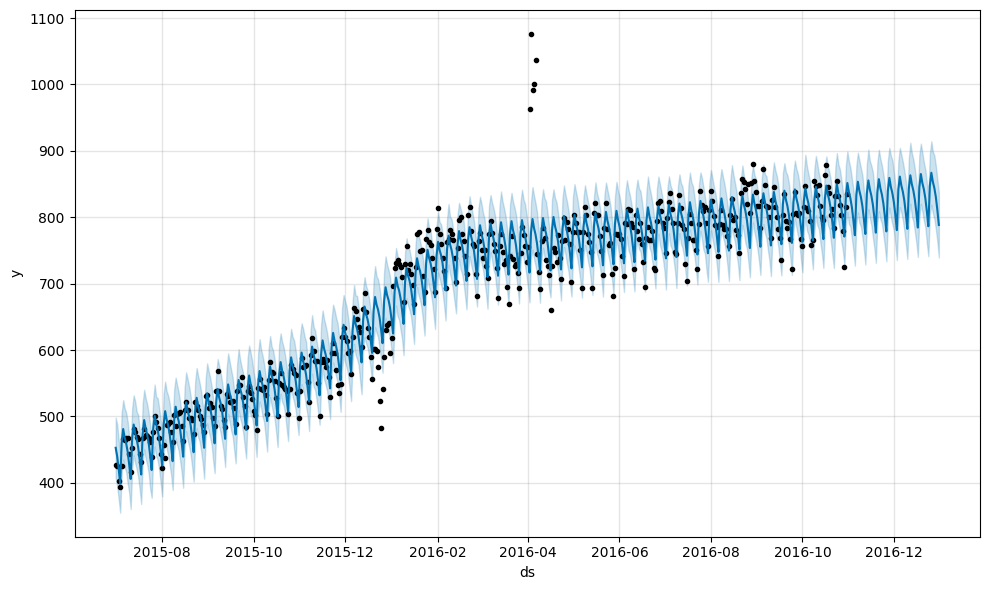

In [126]:
m = Prophet()
m.fit(df2.loc[:, ['ds', 'y']][:-61])
future = m.make_future_dataframe(periods=61, freq='D')
forecast = m.predict(future)
m.plot(forecast)
plt.show()

In [87]:
forecast['yhat'].head()

0    452.802910
1    439.928156
2    421.106446
3    399.108708
4    460.705100
Name: yhat, dtype: float64

In [88]:
forecast['yhat'].shape

(550,)

In [89]:
pd.concat([df2, forecast[['yhat']]], axis=1).tail()

,ds,y,holiday,yhat
545,2016-12-27,975.0,1,853.416217
546,2016-12-28,944.0,1,844.023448
547,2016-12-29,961.0,1,830.465256
548,2016-12-30,922.0,0,810.960107
549,2016-12-31,853.0,0,788.278931


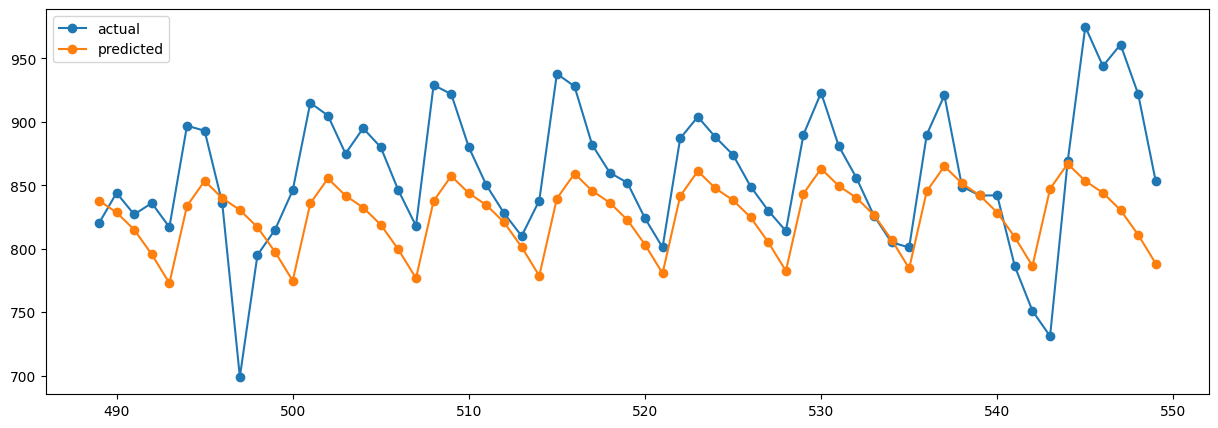

In [90]:
df2['y'][-61:].plot(style='-o', figsize=(15, 5), label='actual')
forecast['yhat'][-61:].plot(style='-o', label='predicted')
plt.legend()
plt.show()

In [91]:
performance_metrics(df2['y'][-61:], forecast['yhat'][-61:])

MAE : 43.818
RMSE :  3039.441
MAPE :  0.051


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi68834d7/7dt9yyuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi68834d7/40wuaujh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5376', 'data', 'file=/tmp/tmpi68834d7/7dt9yyuu.json', 'init=/tmp/tmpi68834d7/40wuaujh.json', 'output', 'file=/tmp/tmpi68834d7/prophet_modelk42wc4bh/prophet_model-20230420030350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:03:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:03:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


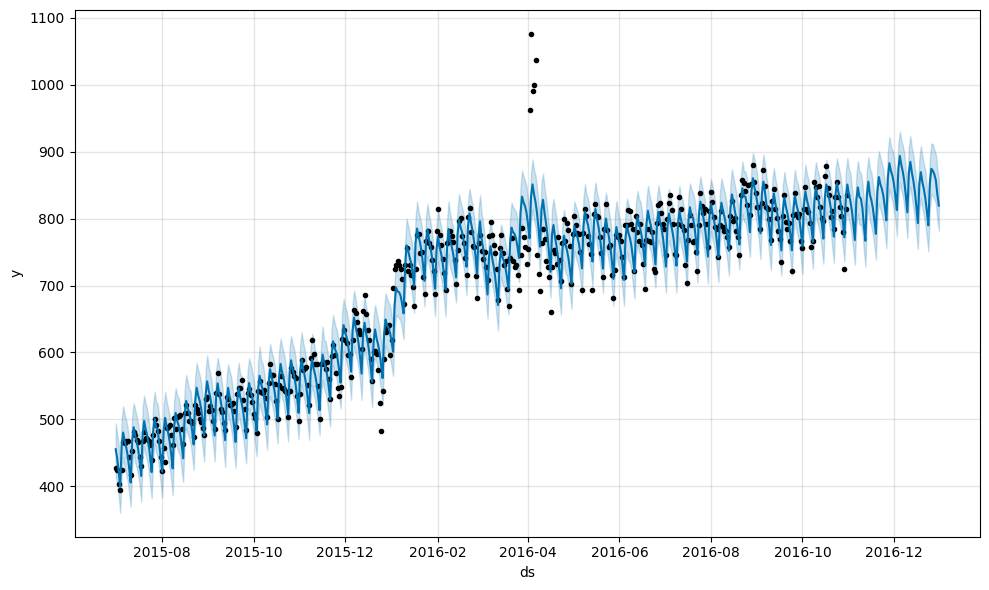

In [92]:
model2 = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model2.add_regressor('holiday')
model2.fit(df2[:-61])
forecast2 = model2.predict(df2)
fig = model2.plot(forecast2)

In [93]:
forecast2['yhat'].head()

0    455.369105
1    441.712804
2    422.105819
3    399.456014
4    460.535249
Name: yhat, dtype: float64

In [94]:
forecast2['yhat'].shape

(550,)

In [95]:
pd.concat([df2, forecast2[['yhat']]], axis=1).tail()

,ds,y,holiday,yhat
545,2016-12-27,975.0,1,871.543143
546,2016-12-28,944.0,1,866.124929
547,2016-12-29,961.0,1,857.398919
548,2016-12-30,922.0,0,836.175284
549,2016-12-31,853.0,0,819.472716


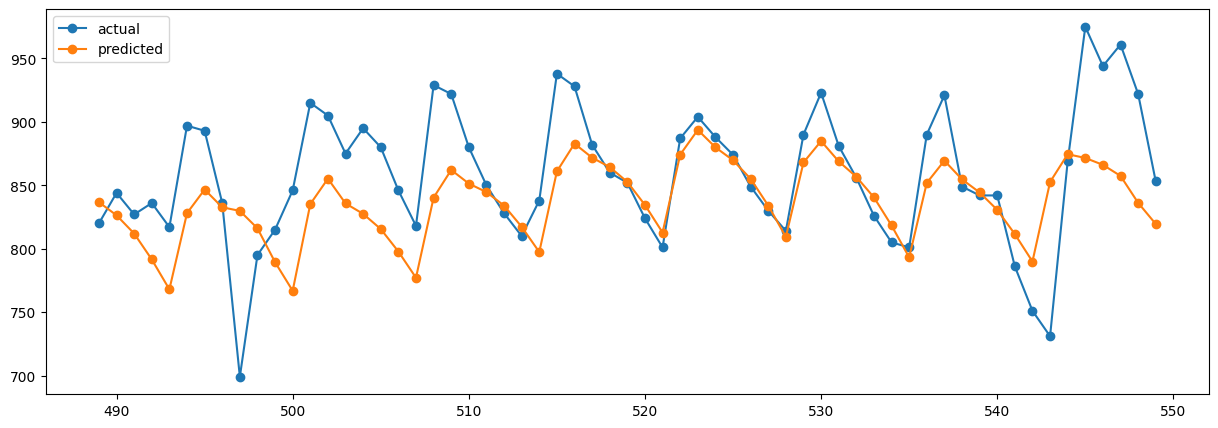

In [96]:
df2['y'][-61:].plot(style='-o', figsize=(15, 5), label='actual')
forecast2['yhat'][-61:].plot(style='-o', label='predicted')
plt.legend()
plt.show()

In [97]:
performance_metrics(df2['y'][-61:], forecast2['yhat'][-61:])

MAE : 35.544
RMSE :  2333.262
MAPE :  0.041


# Summarizing all the Metrics for 'english'

### ARIMA

In [99]:
performance_metrics(test_X['english'], pred['english'])

MAE : 58.276
RMSE :  4695.387
MAPE :  0.067


### SARIMAX

In [100]:
performance_metrics(test_X['english'], predictions)

MAE : 37.855
RMSE :  2401.919
MAPE :  0.044


### Prophet without exog

In [101]:
performance_metrics(df2['y'][-61:], forecast['yhat'][-61:])

MAE : 43.818
RMSE :  3039.441
MAPE :  0.051


### Prophet with exog

In [103]:
performance_metrics(df2['y'][-61:], forecast2['yhat'][-61:])

MAE : 35.544
RMSE :  2333.262
MAPE :  0.041


In [108]:
def performance_of_all(lang, train_X, test_X):
  model_new = SARIMAX(train_X[lang], exog=train_X['exog'], order=(9, 1, 5), seasonal_order=[2, 1, 3, 14])
  model_new = model_new.fit(disp=False)

  exog_forecast_new = test_X[['exog']]
  predictions_new = model_new.predict(start=test_X.index[0], end=test_X.index[-1], exog=exog_forecast_new).rename('Predictions')
  print('**'*50)
  print('Metrics for {}'.format(lang))
  performance_metrics(test_X[lang], predictions_new)

In [116]:
for lan in train_X.columns[:-1]:
  performance_of_all(lan, train_X, test_X)

****************************************************************************************************
Metrics for chinese
MAE : 6.462
RMSE :  62.344
MAPE :  0.057
****************************************************************************************************
Metrics for english
MAE : 37.855
RMSE :  2401.919
MAPE :  0.044
****************************************************************************************************
Metrics for french
MAE : 13.335
RMSE :  318.795
MAPE :  0.073
****************************************************************************************************
Metrics for german
MAE : 10.318
RMSE :  188.101
MAPE :  0.06
****************************************************************************************************
Metrics for japanese
MAE : 9.395
RMSE :  137.693
MAPE :  0.039
****************************************************************************************************
Metrics for russian
MAE : 20.239
RMSE :  829.861
MAPE :  0.057
********************

# Observations & Recommendations

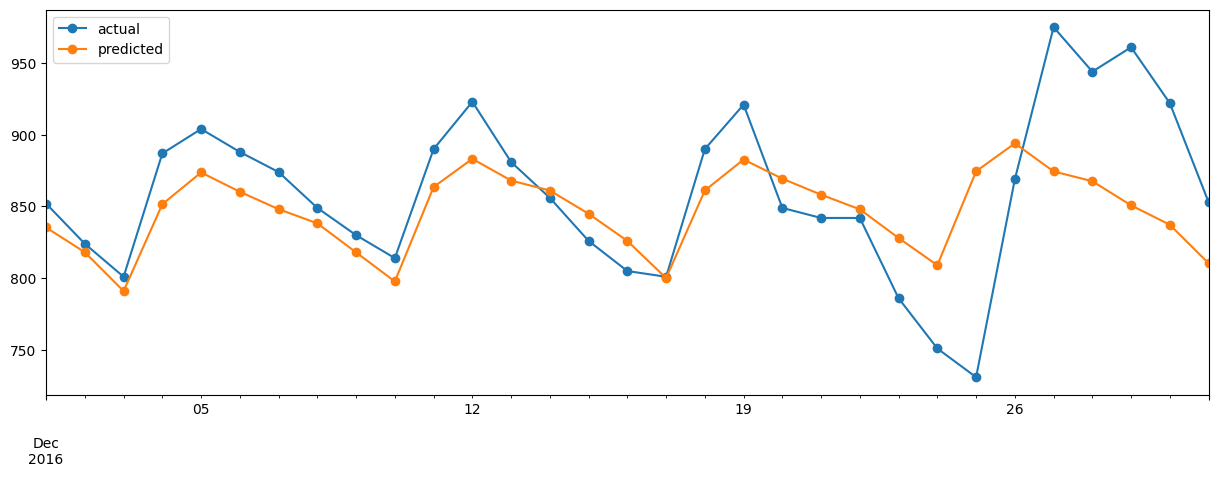

In [110]:
test_X['english'][-31:].plot(style='-o', figsize=(15, 5), label='actual')
predictions[-31:].plot(style='-o', label='predicted')
plt.legend()
plt.show()

In [111]:
pd.DataFrame({"actual":test_X["english"][-31:],"predicted":predictions[-31:],"days":pd.Series(test_X["english"][-31:].index).dt.day_name().values})[:20].T

,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20
actual,852.0,824.0,801.0,887.0,904.0,888.0,874.0,849.0,830.0,814.0,890.0,923.0,881.0,856.0,826.0,805.0,801.0,890.0,921.0,849.0
predicted,835.356368,818.079496,790.991019,851.600714,873.713752,860.244659,848.117946,838.258644,817.996574,797.72042,863.56859,883.221012,868.074039,861.12585,844.927464,826.00015,800.085642,861.153205,882.739477,869.380932
days,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday


### **Insights**:
Viewers on page is very low during Thursday, Friday, Saturday

*   High numbers of visits to the page during start of the week - Sunday, Monday, Tuesday
*   Viewership is average on Wednesday
*   Most viewed page by languges are,  
    *   english(33.65%), 
    *   spanish(21.44%), 
    *   russian(15%), 
    *   japanese(10.8%), 
    *   french(7.13%), 
    *   german(7%), 
    *   chinese(5%)
* Considering the high population of Chinese, it's surprising to see low viewership for the language.

# **Recommendations:**
* Customized Ads can be shown on start of the week like Sunday, Monday, Tuesday's as there is a high volume of viewership on these days. 
* Promotional Ads can be air'ed other days of the week to attract more vieweship & hits to the page
* Language & regional specific Ads will attract more viewership for the less popular languages like Chineses, German, French and Japanese
* Language specific Ads can be published based on the respective community settlement areas